> The DASCH analysis pipeline produces either magnitudes or limits for all 1581 plates covering the area of KIC8462852

Can we reproduce the 1581?

>  For ordinary data quality selection, I reject plates with (1) 'yellow' or 'red' sensitive emulsion, (2) quality flags indictor, 'AFLAGS', >9000, (3) one-sigma  error  bars >0.33  mag,  or  (4)  the  target  within  0.2  magnitudes  of the  quoted  plate limit.  With these selections, I have 1232 magnitudes from DASCH.

Can we reproduce 1232?

In [1]:
%matplotlib inline

import pandas as pd

/home/richard/miniconda/envs/kic/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


How many rows are there in the full dataset?

In [2]:
path = 'fullshort_K8462852.db'
all_rows = pd.read_csv(path, delimiter='\t', skiprows=range(5) + [6])
print 'Number of rows:', len(all_rows)
all_rows[:5]

Number of rows: 2506


,Date,year,magcal_magdep,magcal_local_rms,limiting_mag_local,ra,dec,THETA_J2000,ELLIPTICITY,Plate,versionId,AFLAGS,timeAccuracy
0,2411313.525236,1889.849384,11.91,0.31,12.91,301.56502,44.45708,-87.3,0.511,i00083,96,0,0.0007
1,2411640.532201,1890.745294,11.56,0.49,12.59,301.56445,44.45697,-51.5,0.446,i01889,96,33554432,0.0007
2,2411640.603185,1890.745488,12.31,0.25,13.13,301.56429,44.45796,41.3,0.181,i01893,96,69206016,0.0007
3,2411682.462369,1890.860171,0.00,0.00,11.76,0.00000,0.00000,0.0,0.000,i02227,96,0,-1.0000
4,2411692.454482,1890.887547,11.51,3.02,12.36,301.56575,44.45693,-22.6,0.367,i02302,96,369137664,0.0007


That's decidely more than 1581! What gives?

In [3]:
print 'Number of observations with non-zero magnitude:', len(all_rows[all_rows.magcal_magdep != 0])
print 'Number of observations with non-zero magnitude RMS:', len(all_rows[all_rows.magcal_local_rms != 0])
print 'Number of unique plates:', len(all_rows.groupby('Plate'))

Number of observations with non-zero magnitude: 1249
Number of observations with non-zero magnitude RMS: 1249
Number of unique plates: 2497


That's odd - we have 9 more observations than unique plates. What's going on...?

In [4]:
plate_counts = all_rows.groupby('Plate').size()
duplicate_plates = plate_counts[plate_counts > 1]
all_rows[all_rows.Plate.isin(duplicate_plates.index)]

,Date,year,magcal_magdep,magcal_local_rms,limiting_mag_local,ra,dec,THETA_J2000,ELLIPTICITY,Plate,versionId,AFLAGS,timeAccuracy
321,2416309.672765,1903.531980,0.00,0.00,12.55,0.00000,0.00000,0.0,0.000,am02115,99,0,-1.00000
322,2416309.675102,1903.531987,12.25,99.00,12.41,301.56355,44.45808,84.2,0.430,am02115,99,12416,0.00070
893,2420336.743756,1914.556832,0.00,0.00,12.82,0.00000,0.00000,0.0,0.000,ac15346,99,0,-1.00000
894,2420336.746282,1914.556839,11.89,0.36,12.61,301.56533,44.45758,65.7,0.496,ac15346,99,0,0.00070
1638,2427414.492057,1933.934225,11.90,0.15,13.14,301.56487,44.45708,61.4,0.146,rh05586,96,128,0.00001
1639,2427414.493100,1933.934228,0.00,0.00,13.28,0.00000,0.00000,0.0,0.000,rh05586,96,0,-1.00000
1722,2428053.747734,1935.685610,0.00,0.00,12.63,0.00000,0.00000,0.0,0.000,rh06757,96,0,-1.00000
1723,2428053.750242,1935.685617,12.12,0.30,12.51,301.56474,44.45744,-25.2,0.288,rh06757,96,8320,0.00001
1727,2428057.680369,1935.696385,0.00,0.00,13.12,0.00000,0.00000,0.0,0.000,rh06768,96,0,-1.00000
1728,2428057.682801,1935.696391,12.16,99.00,13.00,301.56455,44.45744,6.8,0.135,rh06768,96,4096,0.00070


... OK, so each duplicate is a pair, one of which is almost complete bogus.

In [5]:
all_rows[all_rows.magcal_local_rms == 0]

,Date,year,magcal_magdep,magcal_local_rms,limiting_mag_local,ra,dec,THETA_J2000,ELLIPTICITY,Plate,versionId,AFLAGS,timeAccuracy
3,2411682.462369,1890.860171,0,0,11.76,0,0,0,0,i02227,96,0,-1
11,2412099.467865,1892.002644,0,0,12.44,0,0,0,0,i05303,96,0,-1
20,2412451.541764,1892.964595,0,0,12.50,0,0,0,0,i07754,96,0,-1
78,2414755.851850,1899.274937,0,0,11.40,0,0,0,0,ac00280,96,0,-1
79,2414767.854059,1899.307819,0,0,11.95,0,0,0,0,ac00302,99,0,-1
84,2414801.712053,1899.400581,0,0,11.30,0,0,0,0,ac00334,99,0,-1
89,2414809.842223,1899.422855,0,0,12.13,0,0,0,0,i22988,96,0,-1
90,2414812.747464,1899.430815,0,0,11.64,0,0,0,0,ac00344,99,0,-1
100,2414823.558488,1899.460434,0,0,11.03,0,0,0,0,i23041,96,0,-1
101,2414823.568185,1899.460461,0,0,12.48,0,0,0,0,i23042,96,0,-1


## Select relevant observations

In [6]:
df = all_rows

df = df[df.magcal_local_rms != 0]
print 'Local RMS != 0:', len(df)

df = df[df.AFLAGS <= 9000]
print 'AFLAGS <= 9000:', len(df)
#df = df[df.AFLAGS == 0]
#print 'AFLAGS == 0:', len(df)
df = df[df.magcal_local_rms <= 0.33]
print 'Local RMS <= 0.33:', len(df)
df = df[df.magcal_magdep > df.magcal_local_rms + 0.2]
print 'Magnitude > local RMS (???):', len(df)

Local RMS != 0: 1249
AFLAGS <= 9000: 985
Local RMS <= 0.33: 716
Magnitude > local RMS (???): 716


## Group into 5-year bins

In [7]:
grouped = df.groupby(df.year.map(lambda year: (year // 5) * 5))

## Partially reproduce "Fig 1. The 5-year binned light curve of KIC8462852"

_We're not bothering with the two check stars._

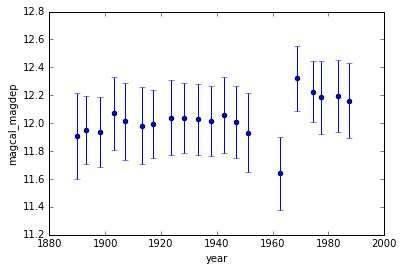

In [8]:
import numpy as np
df = grouped.aggregate(np.mean)
df.plot(kind='scatter', x='year', y='magcal_magdep', yerr='magcal_local_rms')

## Partially reproduce "Table 1. Harvard light curve of KIC8462852 and two check stars"

_We're not bothering with the two check stars._